<a href="https://colab.research.google.com/github/joaogabrielanuto/quant-traders/blob/under-construction/python/Obter_cotacoes_ativos_YF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---
# **Obter dados OHLC de ativos**

### *Dois métodos simples e rápidos pela YFinance*


# 1. Bibliotecas utilizadas

In [ ]:
!pip install yfinance

In [ ]:
# Análise de dados e datas
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz

# Análises estatisticas
from scipy import stats
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import pylab

# Importação cotações OHLC e dividendos
import yfinance as yf

# Bibliotecas gráficas
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [16]:
import yfinance as yf
import pandas as pd

# 2. Obtenção dos dados

Lista atual (10/05/2023) do IBOV (187 ativos)<p>
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

In [7]:
ativos_IBOV = ['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3',
                'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4',
                'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3',
                'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3',
                'CYRE3', 'DXCO3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3',
                'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4',
                'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4',
                'JBSS3', 'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3',
                'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3',
                'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3', 'RRRP3', 'SANB11',
                'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3',
                'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VBBR3', 'VIIA3', 'VIVT3',
                'WEGE3', 'YDUQ3']

In [8]:
# Adicionamos o '.SA' necessário ao Yahoo! Finance

ativos_IBOV_yf = [x + '.SA' for x in ativos_IBOV]

In [9]:
# Inicialmente, vamos buscar apenas o Fechamento (preço ajustado)

df_close = yf.download(ativos_IBOV_yf, period='max')['Adj Close']

[*********************100%***********************]  86 of 86 completed


In [10]:
# Observe as 86 colunas, sendo que cada uma representa o fechamento na data específica

df_close

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117923,1.136025,NaN,...,NaN,NaN,NaN,1.509654,1.665134,NaN,0.996683,7.415913,0.122969,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.064754,1.053404,NaN,...,NaN,NaN,NaN,1.454614,1.625488,NaN,0.996683,7.215065,0.118653,NaN
2000-01-05,0.305528,NaN,NaN,NaN,NaN,NaN,NaN,1.075660,1.089206,NaN,...,NaN,NaN,NaN,1.592999,1.625488,NaN,0.996683,7.295404,0.118653,NaN
2000-01-06,0.290040,NaN,NaN,NaN,NaN,NaN,NaN,1.090657,1.105730,NaN,...,NaN,NaN,NaN,1.737674,1.625488,NaN,0.996683,7.456082,0.107867,NaN
2000-01-07,0.290040,NaN,NaN,NaN,NaN,NaN,NaN,1.066117,1.125008,NaN,...,NaN,NaN,NaN,1.806867,1.684957,NaN,0.996683,7.493162,0.107867,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,14.580000,7.36,18.420000,60.400002,11.47,11.30,11.51,41.709999,12.130000,13.75,...,14.09,25.459999,14.480000,7.200000,69.000000,12.55,1.800000,41.099998,39.900002,8.17
2023-05-04,14.630000,7.68,18.910000,59.500000,11.48,11.33,11.83,42.180000,12.410000,14.07,...,14.02,25.959999,16.190001,7.100000,66.860001,13.13,1.880000,40.919998,39.299999,8.57
2023-05-05,14.490000,8.60,19.250000,63.290001,10.50,11.63,12.49,43.250000,12.860000,14.77,...,13.80,26.549999,16.370001,7.490000,69.040001,13.78,1.950000,41.400002,39.220001,9.27


<Axes: xlabel='Date'>

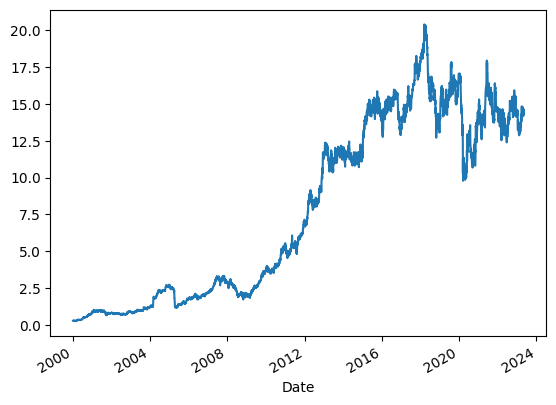

In [11]:
# Plot da evolução do fechamento de AMBEV

df_close['ABEV3.SA'].plot()

In [12]:
# Caso deseje todos os dados OHLCV (preço ajustado de todos os parâmetros)

df_OHLCV = yf.download(ativos_IBOV_yf, period='max', auto_adjust=True)

[*********************100%***********************]  86 of 86 completed


In [13]:
# Note que agora temos 430 colunas (86 x 5 parametros OHLCV => open, high, low, close, volume)

df_OHLC

Close                                                   \
             ABEV3.SA ALPA4.SA   ALSO3.SA   ARZZ3.SA ASAI3.SA AZUL4.SA   
Date                                                                     
2000-01-03        NaN      NaN        NaN        NaN      NaN      NaN   
2000-01-04        NaN      NaN        NaN        NaN      NaN      NaN   
2000-01-05   0.305528      NaN        NaN        NaN      NaN      NaN   
2000-01-06   0.290040      NaN        NaN        NaN      NaN      NaN   
2000-01-07   0.290040      NaN        NaN        NaN      NaN      NaN   
...               ...      ...        ...        ...      ...      ...   
2023-05-03  14.580000     7.36  18.420000  60.400002    11.47    11.30   
2023-05-04  14.630000     7.68  18.910000  59.500000    11.48    11.33   
2023-05-05  14.490000     8.60  19.250000  63.290001    10.50    11.63   
2023-05-08  14.510000     9.24  18.870001  62.560001    11.19    11.72   
2023-05-10  14.330000     9.29  19.190001  66.190002    11.67    12.12   

                                                    ...      Volume  \
           B3SA3.SA   BBAS3.SA   BBDC3.SA BBDC4.SA  ...    TIMS3.SA   
Date                                                ...               
2000-01-03      NaN   1.117923   1.136024      NaN  ...         NaN   
2000-01-04      NaN   1.064754   1.053403      NaN  ...         NaN   
2000-01-05      NaN   1.075660   1.089206      NaN  ...         NaN   
2000-01-06      NaN   1.090657   1.105730      NaN  ...         NaN   
2000-01-07      NaN   1.066117   1.125008      NaN  ...         NaN   
...             ...        ...        ...      ...  ...         ...   
2023-05-03    11.51  41.709999  12.130000    13.75  ...   7375200.0   
2023-05-04    11.83  42.180000  12.410000    14.07  ...  10880700.0   
2023-05-05    12.49  43.250000  12.860000    14.77  ...   9130000.0   
2023-05-08    12.44  43.080002  13.130000    15.32  ...   9746900.0   
2023-05-10    12.64  43.240002  13.310000    15.24  ...   5271100.0   

                                                                              \
             TOTS3.SA    UGPA3.SA  USIM5.SA  VALE3.SA    VBBR3.SA   VIIA3.SA   
Date                                                                           
2000-01-03        NaN         NaN    571500    585600         NaN       6989   
2000-01-04        NaN         NaN   1121400    782400         NaN      16309   
2000-01-05        NaN         NaN   1602450   1876800         NaN      16309   
2000-01-06        NaN         NaN   3084300    792000         NaN     100962   
2000-01-07        NaN         NaN   2871000   5347200         NaN        776   
...               ...         ...       ...       ...         ...        ...   
2023-05-03  2901900.0   8511200.0   9090900  19958300  20387800.0   71872900   
2023-05-04  6229700.0  34257300.0  15209900  35996200  22660900.0   76069100   
2023-05-05  4338200.0  11376100.0  14603800  27107300  16407500.0  121524200   
2023-05-08  6565300.0   8077100.0   5318100  24917600  11028300.0   45948900   
2023-05-10  2023000.0   3729900.0   3357000  12177200   2023400.0   33260500   

                                          
           VIVT3.SA WEGE3.SA    YDUQ3.SA  
Date                                      
2000-01-03       98   378560         NaN  
2000-01-04      228    47320         NaN  
2000-01-05      120        0         NaN  
2000-01-06      123   250120         NaN  
2000-01-07      266   135200         NaN  
...             ...      ...         ...  
2023-05-03  1647700  5451100   4176400.0  
2023-05-04  1831700  5340400   5152500.0  
2023-05-05  1961000  7852800   6740400.0  
2023-05-08  2957600  4669200   3273200.0  
2023-05-10   998200  1243700  11279600.0  

[5865 rows x 430 columns]

In [22]:
# Dados MultiIndex que exigem um pouco mais de manipulação nos dados

df_OHLC.columns

MultiIndex([( 'Close', 'ABEV3.SA'),
            ( 'Close', 'ALPA4.SA'),
            ( 'Close', 'ALSO3.SA'),
            ( 'Close', 'ARZZ3.SA'),
            ( 'Close', 'ASAI3.SA'),
            ( 'Close', 'AZUL4.SA'),
            ( 'Close', 'B3SA3.SA'),
            ( 'Close', 'BBAS3.SA'),
            ( 'Close', 'BBDC3.SA'),
            ( 'Close', 'BBDC4.SA'),
            ...
            ('Volume', 'TIMS3.SA'),
            ('Volume', 'TOTS3.SA'),
            ('Volume', 'UGPA3.SA'),
            ('Volume', 'USIM5.SA'),
            ('Volume', 'VALE3.SA'),
            ('Volume', 'VBBR3.SA'),
            ('Volume', 'VIIA3.SA'),
            ('Volume', 'VIVT3.SA'),
            ('Volume', 'WEGE3.SA'),
            ('Volume', 'YDUQ3.SA')],
           length=430)

In [19]:
# Função melt (wide to long) para reorganizar o multiindex de colunas em linhas (cada coluna de index 0 vira uma coluna e index 1 vira outra coluna)
# Temos agora três colunas apenas, num formato long muito mais fácil de manipulação de dados (mesmo sendo 2.5 milhões de linhas)

df_OHLCV_reorganizado = pd.melt(df_OHLC, ignore_index=False)
df_OHLCV_reorganizado.columns = ['parametro', 'ativo', 'preco']
df_OHLCV_reorganizado

,parametro,ativo,preco
Date,,,
2000-01-03,Close,ABEV3.SA,NaN
2000-01-04,Close,ABEV3.SA,NaN
2000-01-05,Close,ABEV3.SA,3.055276e-01
2000-01-06,Close,ABEV3.SA,2.900401e-01
2000-01-07,Close,ABEV3.SA,2.900401e-01
...,...,...,...
2023-05-03,Volume,YDUQ3.SA,4.176400e+06
2023-05-04,Volume,YDUQ3.SA,5.152500e+06
2023-05-05,Volume,YDUQ3.SA,6.740400e+06


<Axes: xlabel='Date'>

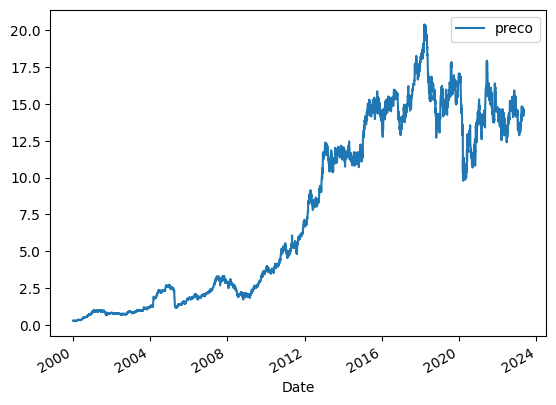

In [21]:
df_OHLCV_reorganizado[(df_OHLCV_reorganizado.ativo=='ABEV3.SA') & (df_OHLCV_reorganizado.parametro	=='Close')].plot()